In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split

import seaborn as sns
sns.set(style = "white")

In [4]:
#从sklearn库中导入鸢尾花（Iris）数据集
from sklearn.datasets import load_iris

iris_dataset = load_iris()
print('Keys of iris_dataset: \n{}'.format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
#DESCR - 键对应的值是数据集的简要说明
print(iris_dataset['DESCR'][:193] + '\n...')

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [6]:
#target_names - 键对应的值是一个字符串数
print('Target names:{}'.format(iris_dataset['target_names']))

Target names:['setosa' 'versicolor' 'virginica']


In [7]:
#feature_names - 键对应的值是一个字符串列表
print('Feature names:\n{}'.format(iris_dataset['feature_names']))

Feature names:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
print('Type of data:{}'.format(type(iris_dataset['data'])))

Type of data:<class 'numpy.ndarray'>


In [9]:
print('Shape of data:{}'.format(iris_dataset['data'].shape))

Shape of data:(150, 4)


In [10]:
#给出前5个样本的特征数值
print('First five rows of data:\n{}'.format(iris_dataset['data'][:5]))

First five rows of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [11]:
print('Type of target:{}'.format(type(iris_dataset['target'])))

Type of target:<class 'numpy.ndarray'>


In [12]:
print('Shape of target:{}'.format(iris_dataset['target'].shape))

Shape of target:(150,)


In [13]:
print('Target: \n{}'.format(iris_dataset['target']))

Target: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [14]:
# train_test_split函数利用伪随机数生成器将数据集打乱
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state = 0)

In [15]:
print('X_train shape:{}'.format(X_train.shape))
print('y_train shape:{}'.format(y_train.shape))

X_train shape:(112, 4)
y_train shape:(112,)


In [16]:
print('X_test shape:{}'.format(X_test.shape))
print('y_test shape:{}'.format(y_test.shape))

X_test shape:(38, 4)
y_test shape:(38,)


* 利用X_train中的数据创建DataFrame
* 利用iris_dataset.feature_names中的字符串对数据列进行标记
* 利用DataFrame创建散点图矩阵，按有y_train着色

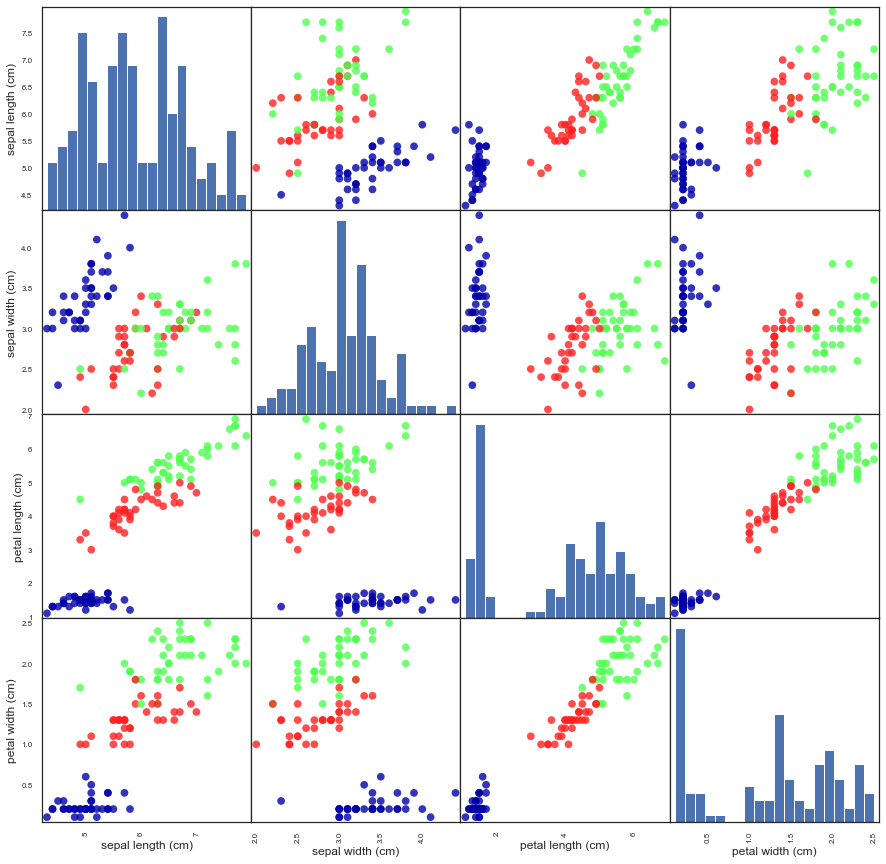

In [17]:
iris_dataframe = pd.DataFrame(X_train, columns = iris_dataset.feature_names)
grr = pd.plotting.scatter_matrix(iris_dataframe, c = y_train, figsize = (15,15), 
                                 marker = 'o', hist_kwds = {'bins': 20},
                                 s=60, alpha=.8, cmap = mglearn.cm3)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)

调用knn对象的fit方法,基于训练集来构建模型,输入参数为X_train和y_ train

In [19]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [20]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print('X_new.shape:{}'.format(X_new.shape))

X_new.shape:(1, 4)


调用knn对象的predict方法来进行预测

In [21]:
prediction = knn.predict(X_new)
print('Predition:{}'.format(prediction))
print('Predicted target name:{}'.format(
iris_dataset['target_names'][prediction]))

Predition:[0]
Predicted target name:['setosa']


通过计算精度来衡量模型优劣,以评估模型。

In [22]:
y_pred = knn.predict(X_test)
print('Test set predictions:\n{}'.format(y_pred))
print('Test set score:{:.2f}'.format(np.mean(y_pred == y_test)))

Test set predictions:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
Test set score:0.97


还可以使用knn对象的score方法来计算测试集的精度

In [23]:
print('Test set score:{:.2f}'.format(knn.score(X_test, y_test)))

Test set score:0.97
